<a href="https://colab.research.google.com/github/isahaasasu/MAT422/blob/main/HW1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1.4: Principle Component Analysis

##Singular Value Decomposition

Singular Value Decomposition factors a matrix into 3 matrices: A = USV^T

Given an m x n matrix A, we can decompose A into USV^T, where U is an orthogonal n x n matrix of eigenvectors of AA^T. S is a nonnegative diagonal matrix of singular values also in hierarchical order. V^T is a transposed  orthogonal m x m matrix which corresponds to the U and S matrices with eigenvectors of A^TA.

In [1]:
import numpy as np
from scipy.linalg import svd

X = np.array([[2, 1, 4], [5, 5,-2]])
print("Matrix A \n", X, "\n")

U, singular,V_transpose = svd(X) #Singular value decomposition

print("Matrix U \n", U, "\n")
print("Singular array \n", singular, "\n")
print("Matrix V^T \n", V_transpose, "\n")

Matrix A 
 [[ 2  1  4]
 [ 5  5 -2]] 

Matrix U 
 [[ 0.19927145  0.97994433]
 [ 0.97994433 -0.19927145]] 

Singular array 
 [7.44469263 4.42453971] 

Matrix V^T 
 [[ 0.71168345  0.68491654 -0.15619219]
 [ 0.21776987 -0.00370952  0.9759931 ]
 [-0.66789441  0.72861209  0.15179419]] 



In [2]:
# Another way to do SVD
A = np.random.randint(10, size = (3, 4))
u, s, vt = np.linalg.svd(A, full_matrices=True)
print("U:", u.shape, "\nS:", s.shape, "\nVt:", vt.shape, "\n")
print("U: \n", u, "\nS: \n", s, "\nVt: \n", vt, "\n")

U: (3, 3) 
S: (3,) 
Vt: (4, 4) 

U: 
 [[ 0.73496679 -0.21857443  0.64191045]
 [ 0.41297982  0.89509939 -0.16806178]
 [ 0.53783964 -0.38861588 -0.74813516]] 
S: 
 [17.02596171  6.3688915   6.12811953] 
Vt: 
 [[ 0.67842183  0.52439743  0.32218327  0.40118461]
 [ 0.71955913 -0.58021333 -0.32795006 -0.19502797]
 [-0.12399539 -0.60242394  0.38432547  0.68847983]
 [-0.08126266  0.15951559 -0.80058768  0.57184834]] 



##Principal Component Analysis

Principal component analysis (PCA) is a dimensionality reduction method that reduces the dimensionality of large data sets by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [3]:
# Example from sklearn

import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [4]:
print(__doc__)


# Code source: Gaël Varoquaux
# Link: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

# initiate random numbers, with the seed reset (every time),
# the same set of numbers will appear every time.
np.random.seed(5)

# load the Iris dataset
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.data.shape

Automatically created module for IPython interactive environment


(150, 4)

This next example is from towarddatascience.com

In [5]:
# Generic
import pandas as pd
import numpy as np

# Generate data sets
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Create an array with 3 clusters in 3-dimensions
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=0, cluster_std=[1,2,3], center_box=(10,65))

# Standardize the data
X = StandardScaler().fit_transform(X)

# Prepare the array in a DataFrame
col_name = ['x' + str(idx) for idx in range(0, X.shape[1])]
df = pd.DataFrame(X, columns=col_name)
df['cluster_label'] = y

df.head()

,x0,x1,x2,cluster_label
0,-0.366353,1.022466,1.166899,2
1,-1.179214,1.318905,1.047407,2
2,0.346441,-1.360488,-0.417740,1
3,0.507115,0.055279,-0.890964,0
4,-0.185192,0.937566,0.930304,2


In [6]:
# Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(df[col_name])
PC_components = np.arange(pca.n_components_) + 1

In [7]:
# Perform PCA (Choose n_components to keep)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)

# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y

df_pca.head()

,PC1,PC2,label
0,1.750435,-0.041716,2
1,2.255957,-0.226133,2
2,-1.058243,0.998596,1
3,-1.165212,-0.799110,0
4,1.478118,-0.034766,2


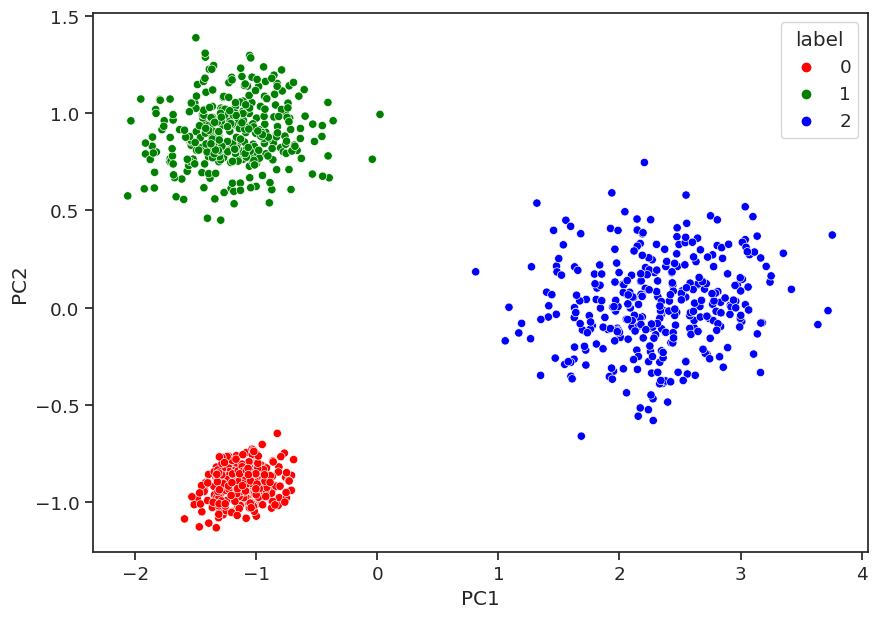

In [8]:
# Plot Principal Component
_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df_pca['label'], palette=['red', 'green', 'blue'])